### Logistic Regression

In [45]:
import pandas as pd
import numpy as np
df=pd.read_csv("C://Users//hp//Desktop//ML Project Pipe//pipe1.csv")
df

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial,crack
0,3,0.4217,2,1,0.6131,0.9991,1
1,6,0.7629,4,-2,0.3846,0.9982,1
2,5,0.1898,1,-7,0.6917,0.9982,1
3,2,0.4062,2,-2,0.5927,0.9980,1
4,6,0.8078,4,-10,0.9345,0.9980,1
...,...,...,...,...,...,...,...
1936,4,0.7451,3,-11,0.8008,0.0258,1
1937,4,0.4697,2,-4,0.1728,0.0257,1
1938,3,0.0448,1,-2,0.5649,0.0254,0
1939,1,0.7149,3,9,0.2688,0.0253,1


In [46]:
df.describe

<bound method NDFrame.describe of       material    tomr  cf  c_wave_no  cd_radial  cw_circumferencial  crack
0            3  0.4217   2          1     0.6131              0.9991      1
1            6  0.7629   4         -2     0.3846              0.9982      1
2            5  0.1898   1         -7     0.6917              0.9982      1
3            2  0.4062   2         -2     0.5927              0.9980      1
4            6  0.8078   4        -10     0.9345              0.9980      1
...        ...     ...  ..        ...        ...                 ...    ...
1936         4  0.7451   3        -11     0.8008              0.0258      1
1937         4  0.4697   2         -4     0.1728              0.0257      1
1938         3  0.0448   1         -2     0.5649              0.0254      0
1939         1  0.7149   3          9     0.2688              0.0253      1
1940         4  0.7759   4          7     0.9258              0.0252      1

[1941 rows x 7 columns]>

In [47]:
df.shape


(1941, 7)

In [48]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [49]:
data = pd.read_csv('C://Users//hp//Desktop//ML Project Pipe//pipe.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(1941, 7)
['material', 'tomr', 'cf', 'c_wave_no', 'cd_radial', 'cw_circumferencial', 'crack']


In [50]:
data.head()

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial,crack
0,2,0.8488,2,3,0.6106,0.2070,1
1,4,0.8316,1,-8,0.8701,0.6067,0
2,4,0.1553,1,6,0.3701,0.1110,1
3,5,0.9015,4,-2,0.2415,0.6505,1
4,5,0.2654,2,6,0.8359,0.8717,0


In [51]:
data['tomr'].unique()

array([0.8488, 0.8316, 0.1553, ..., 0.8303, 0.863 , 0.9146])

In [52]:
data['c_wave_no'].unique()

array([  3,  -8,   6,  -2, -10,   9,   5,  -3,  10,  -9,   7,  -4,  -5,
        -7,   2,  -6,  -1, -11,  11,   8,   0,   1,   4], dtype=int64)

In [53]:
data['cd_radial'].unique()

array([0.6106, 0.8701, 0.3701, ..., 0.714 , 0.0931, 0.9466])

In [54]:
data['cw_circumferencial'].unique()

array([0.207 , 0.6067, 0.111 , ..., 0.8553, 0.5016, 0.0801])

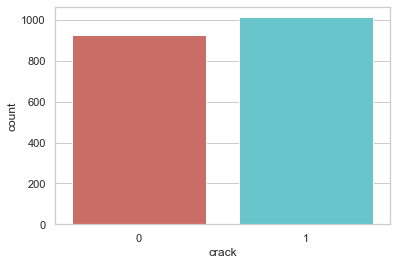

<Figure size 432x288 with 0 Axes>

In [55]:
data['crack'].value_counts()
sns.countplot(x='crack',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [56]:
data.groupby('crack').mean()

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial
crack,,,,,,
0,3.561422,0.506541,2.553879,-0.191810,0.506990,0.510127
1,3.441264,0.519742,2.470879,-0.234946,0.508227,0.500778


In [57]:
#Hyperparameter Tuning

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

X=data.drop(['crack'],axis=1)
y=data['crack']

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']  #we can see useful differences in performance or convergence with different solvers (solver)
penalty = ['l2']  #Regularization (penalty)
c_values = [100, 10, 1.0, 0.1, 0.01]  #C parameter controls the penalty strength
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.522928 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.518469 (0.036431) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.518984 (0.037119) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.518984 (0.037239) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.518640 (0.036380) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.518812 (0.036546) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.518983 (0.037179) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.518811 (0.035577) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.518640 (0.035480) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.520528 (0.036893) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.521042 (0.035532) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.520871 (0.035509) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.522928 (0.035864) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.515369 (0.028984) wit

In [58]:
# drop features
X=data.drop(['crack'],axis=1)
y=data['crack']

In [59]:
#model.fit
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.691237
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  crack   No. Observations:                 1941
Model:                          Logit   Df Residuals:                     1935
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                0.001374
Time:                        14:16:46   Log-Likelihood:                -1341.7
converged:                       True   LL-Null:                       -1343.5
Covariance Type:            nonrobust   LLR p-value:                    0.5944
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
material              -0.0183      0.023     -0.788      0.431      -0.064       0.027
tomr 

In [60]:
#traning and testing of model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = logreg.predict(X_test)

In [62]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.49


In [63]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.535


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.33      0.38       276
           1       0.51      0.63      0.56       307

    accuracy                           0.49       583
   macro avg       0.48      0.48      0.47       583
weighted avg       0.48      0.49      0.48       583



### SVC(Support Vector Classifier)

In [35]:
  
#importing datasets  
data_set= pd.read_csv('C://Users//hp//Desktop//ML Project Pipe//pipe1.csv')  
data_set
  

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial,crack
0,3,0.4217,2,1,0.6131,0.9991,1
1,6,0.7629,4,-2,0.3846,0.9982,1
2,5,0.1898,1,-7,0.6917,0.9982,1
3,2,0.4062,2,-2,0.5927,0.9980,1
4,6,0.8078,4,-10,0.9345,0.9980,1
...,...,...,...,...,...,...,...
1936,4,0.7451,3,-11,0.8008,0.0258,1
1937,4,0.4697,2,-4,0.1728,0.0257,1
1938,3,0.0448,1,-2,0.5649,0.0254,0
1939,1,0.7149,3,9,0.2688,0.0253,1


In [36]:
#Data Pre-processing Step  
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
 
# Data Set
 
data= pd.read_csv('C://Users//hp//Desktop//ML Project Pipe//pipe1.csv') 
X=data.drop(['crack'],axis=1)
y=data['crack']
 


In [37]:
# Creating training and test split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)
 


In [38]:
# Feature Scaling
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 


In [39]:
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)
 
# Mode performance
 
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

     

Accuracy: 0.717


In [40]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.714


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.53      0.52       166
           1       0.81      0.79      0.80       417

    accuracy                           0.72       583
   macro avg       0.66      0.66      0.66       583
weighted avg       0.72      0.72      0.72       583



In [42]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.713 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [44]:

grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       166
           1       0.80      0.82      0.81       417

    accuracy                           0.73       583
   macro avg       0.66      0.66      0.66       583
weighted avg       0.72      0.73      0.72       583

